In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#using 2 antennas
dataset = pd.read_csv('human_walking_direction_elbatanony_421.csv').drop('Unnamed: 0',axis=1)

1. We collected 100 packets every 5 secs for each behavior. 
2. 2000 samples for left, right, and no_person. 1000 samples for up.
3. We have 56 subcarrier and we will use 30 subcarriers
4. We have 2 * 2 antennas. So, we have four csi values at receiver (1_1, 1_2, 2_1, 2_2)=>(i_j), i for receiver and j for transmitter.
5. I will loop for each subcarrier and select 100 values for packet num for example subcarrier 0 contains 2000 values for no of packets, So 2000/100-> 20 behavior.
6. We have 30 subcarriers, then we will have 20*30=600 rows for left, right, and no person but for up 1000/100 * 30=300 therefore the total number of rows=600+600+600+300=2100
7. for columns, We have 100 packet for each antenna pair then 100*4=400 therefore We have 400 amplitudes, 400 phases and label col then the total number of columns=801
8. Therefore for each row we have the amplitudes and phases for 100 packets (one behavior)



1. s_n -> subcarrier num
2. a_n -> antenna_num
3. d_n -> data_num
4. tp_n ->  total number of packets for each behavior
5. tb_n ->  total number of behaviors for each activty
6. N  -> activities number
7. TR_n -> total number of rows
8. TC_n -> total number of columns
9. tb_n= d_n/tp_n    ->          (tb_n= 2000/100 =20   , tb_n= 1000/100 =10)
10. TR_n= tb_n*s_n*N   ->         (TR_n = 20*30*3 + 10*30*1=1800+300=2100)
11. TC_n= (tp_n * a_n  * 2) + 1  ->   (TC_n= (100*4*2)+1 = 801)
12. DS_n = TR_n * TC_n ->  (2100*801)

 

In [3]:
dataset.head()

,amplitude antenna1_1:0,amplitude antenna1_1:1,amplitude antenna1_1:2,amplitude antenna1_1:3,amplitude antenna1_1:4,amplitude antenna1_1:5,amplitude antenna1_1:6,amplitude antenna1_1:7,amplitude antenna1_1:8,amplitude antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,55.857512,54.117613,52.267359,49.776277,46.734430,43.747906,40.896785,38.270809,35.994402,33.814055,...,1.247599,0.258984,2.456885,-0.351929,-0.622513,0.224466,-1.213963,-0.972859,-1.208178,left_direction
1,54.997367,55.634059,56.281497,56.611513,56.175409,55.725772,55.309561,54.123381,52.190608,50.426106,...,-6.059594,1.817915,-1.716796,0.952157,-0.680600,-1.003848,0.331014,-0.277250,0.098659,left_direction
2,156.288692,130.410527,43.641477,54.121934,58.397080,63.586043,66.528211,63.334938,53.705360,47.640608,...,-1.403864,-0.691014,5.014720,-1.423656,0.520230,-0.885333,0.027910,-0.014237,-0.643035,left_direction
3,69.323648,66.537969,64.034603,61.592456,59.336788,56.872320,54.158426,51.242190,48.103049,45.061040,...,-0.318752,0.696146,-2.402680,0.203666,-2.432829,0.043026,-0.428064,-1.296164,0.945840,left_direction
4,65.676813,54.759301,60.133453,42.656594,47.951254,50.017107,49.869055,50.802824,50.345924,49.695743,...,-0.026559,0.115755,-0.529473,-0.324775,-0.354857,0.356410,-0.865391,-0.050983,-0.823402,left_direction


C:\Users\hanan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


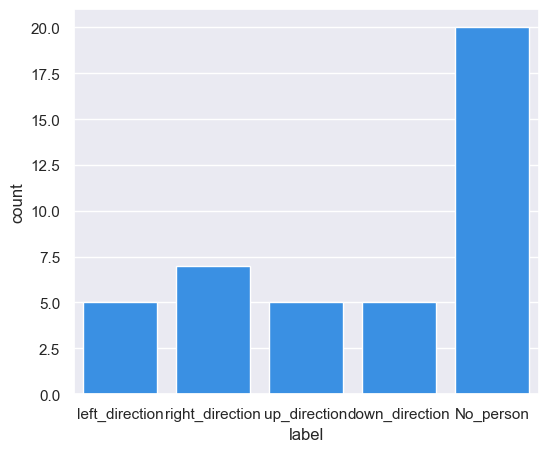

In [4]:
import seaborn as sns

sns.set(color_codes=True)

plt.figure(0, (6, 5))
sns_plot = sns.countplot(dataset['label'], color="dodgerblue", label="Compact")


# Train the dataset

In [5]:
#Data encoding: to convert categorical features to numberical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['label']=label_encoder.fit_transform(dataset['label'])

In [6]:
dataset

,amplitude antenna1_1:0,amplitude antenna1_1:1,amplitude antenna1_1:2,amplitude antenna1_1:3,amplitude antenna1_1:4,amplitude antenna1_1:5,amplitude antenna1_1:6,amplitude antenna1_1:7,amplitude antenna1_1:8,amplitude antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,55.857512,54.117613,52.267359,49.776277,46.734430,43.747906,40.896785,38.270809,35.994402,33.814055,...,1.247599,0.258984,2.456885,-0.351929,-0.622513,0.224466,-1.213963,-0.972859,-1.208178,2
1,54.997367,55.634059,56.281497,56.611513,56.175409,55.725772,55.309561,54.123381,52.190608,50.426106,...,-6.059594,1.817915,-1.716796,0.952157,-0.680600,-1.003848,0.331014,-0.277250,0.098659,2
2,156.288692,130.410527,43.641477,54.121934,58.397080,63.586043,66.528211,63.334938,53.705360,47.640608,...,-1.403864,-0.691014,5.014720,-1.423656,0.520230,-0.885333,0.027910,-0.014237,-0.643035,2
3,69.323648,66.537969,64.034603,61.592456,59.336788,56.872320,54.158426,51.242190,48.103049,45.061040,...,-0.318752,0.696146,-2.402680,0.203666,-2.432829,0.043026,-0.428064,-1.296164,0.945840,2
4,65.676813,54.759301,60.133453,42.656594,47.951254,50.017107,49.869055,50.802824,50.345924,49.695743,...,-0.026559,0.115755,-0.529473,-0.324775,-0.354857,0.356410,-0.865391,-0.050983,-0.823402,2
5,66.416673,68.662249,69.576948,69.326209,55.230784,65.855673,58.734951,58.293010,65.515114,67.266433,...,0.299336,0.597269,-0.915028,-0.625727,0.307035,-0.601788,-0.192644,0.420419,-0.352439,3
6,124.469278,98.391943,87.498120,79.347496,76.687490,74.442572,70.737687,67.904989,65.257616,63.261853,...,0.801324,-0.182517,-0.484538,-0.678386,5.549726,-0.463456,-1.721149,-0.807948,-1.241007,3
7,177.021689,160.874338,63.125496,36.791930,55.276845,63.255239,62.620686,68.028759,75.199181,81.767216,...,-0.607481,-1.030309,0.605693,0.360240,-0.374965,0.412711,0.974501,-1.228382,0.325485,3
8,82.211138,79.173056,72.961456,72.130033,68.606683,65.341977,60.727373,65.123719,81.196914,81.379831,...,-0.955115,0.483998,0.497169,0.421294,-0.421752,-0.847170,-1.077044,-0.781228,-0.859425,3
9,177.166542,161.571113,66.801395,47.670337,63.151121,73.338594,55.634768,85.194672,74.129387,73.633997,...,-0.535023,-0.920763,0.236041,0.217808,-1.212193,-1.313638,-1.248796,-0.535679,-0.131076,3


In [7]:
dataset['label'].unique()

array([2, 3, 4, 1, 0])

In [8]:
y=dataset['label']

In [9]:
X=dataset.drop('label',axis=1)

In [10]:
y

0     2
1     2
2     2
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    4
17    1
18    1
19    1
20    1
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
Name: label, dtype: int32

In [11]:
#Trainset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size=0.2,random_state=123)

In [12]:
X_train.shape

(33, 3200)

In [13]:
X_test.shape

(9, 3200)

 2      3     4    1    0:
left   right  up  down  No

# classification using ML models

In [14]:
RF_Accuracy=[]
SVM_Accuracy=[]
KNN_Accuracy=[]

# 1. Random Forest Classifier

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfc=RandomForestClassifier(max_depth=12)
classifier_rfc.fit(X_train,y_train)
y_pred_rfc=classifier_rfc.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_rfc))
y_pred_rfc_test=classifier_rfc.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_rfc_test))
RF_Accuracy.append(accuracy_score(y_test,y_pred_rfc_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.7777777777777778


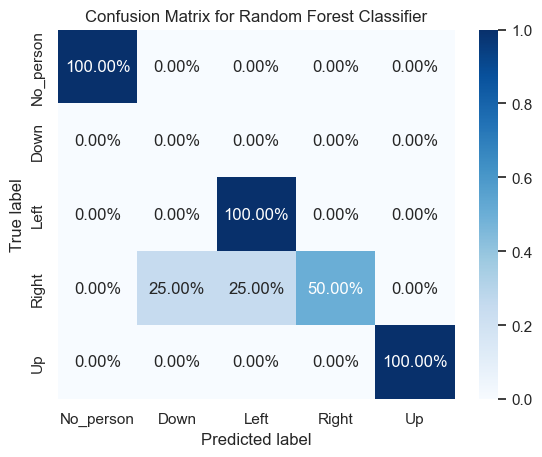

In [17]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [18]:
precision_rfc = precision_score(y_test, y_pred_rfc_test, average='micro')
recall_rfc = recall_score(y_test, y_pred_rfc_test, average='micro')
f1_rfc = f1_score(y_test, y_pred_rfc_test, average='micro')
accuracy_rfc = accuracy_score(y_test, y_pred_rfc_test)

print('Different metrics for testing data')
print("Precision: ", precision_rfc)
print("Recall: ", recall_rfc)
print("F1 score: ", f1_rfc)
print("Accuracy: ", accuracy_rfc)

Different metrics for testing data
Precision:  0.7777777777777778
Recall:  0.7777777777777778
F1 score:  0.7777777777777778
Accuracy:  0.7777777777777778


In [19]:
report_rfc = classification_report(y_test, y_pred_rfc_test)
print("Classification report for Random Forest:")
print(report_rfc)

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         0
           2       0.50      1.00      0.67         1
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         1

    accuracy                           0.78         9
   macro avg       0.70      0.70      0.67         9
weighted avg       0.94      0.78      0.81         9



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Random Forest')

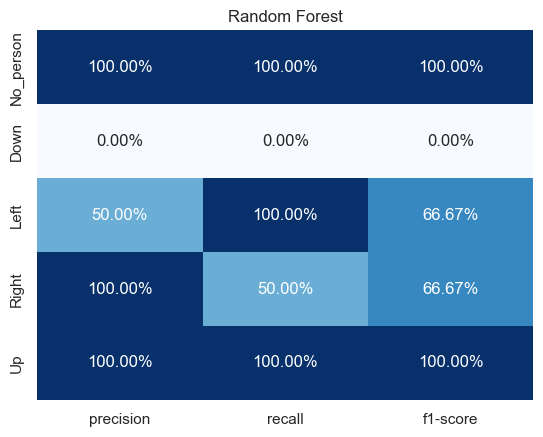

In [20]:
report_rfc = classification_report(y_test, y_pred_rfc_test, output_dict=True)
report_rfc_df = pd.DataFrame(report_rfc).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_rfc_df=report_rfc_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_rfc_df=report_rfc_df.drop(['support'], axis=1)
sns.heatmap(report_rfc_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Random Forest")


# 1.2 Support Vector Machine

In [21]:
from sklearn import svm
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X_train,y_train)
y_pred_svm=classifier_svm.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_svm))
y_pred_svm_test=classifier_svm.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_svm_test))
SVM_Accuracy.append(accuracy_score(y_test,y_pred_svm_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.8888888888888888


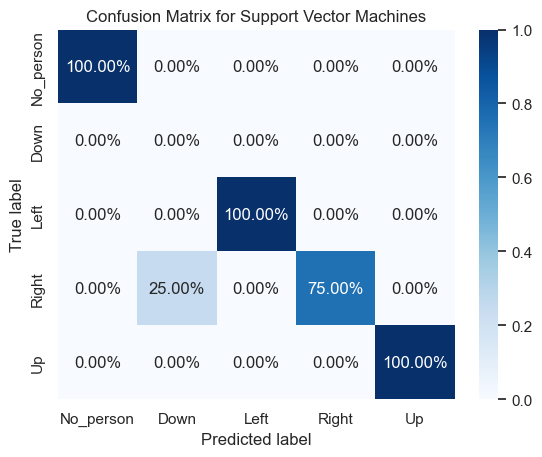

In [22]:
cm_svm = confusion_matrix(y_test, y_pred_svm_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Support Vector Machines")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [23]:
precision_svm = precision_score(y_test, y_pred_svm_test, average='micro')
recall_svm = recall_score(y_test, y_pred_svm_test, average='micro')
f1_svm = f1_score(y_test, y_pred_svm_test, average='micro')
accuracy_svm = accuracy_score(y_test, y_pred_svm_test)

print('Different metrics for testing data')
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1 score: ", f1_svm)
print("Accuracy: ", accuracy_svm)

Different metrics for testing data
Precision:  0.8888888888888888
Recall:  0.8888888888888888
F1 score:  0.8888888888888888
Accuracy:  0.8888888888888888


In [24]:
report_svm = classification_report(y_test, y_pred_svm_test)
print("Classification report for Support Vector Machines:")
print(report_svm)

Classification report for Support Vector Machines:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         1

    accuracy                           0.89         9
   macro avg       0.80      0.75      0.77         9
weighted avg       1.00      0.89      0.94         9



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Support Vector Machines')

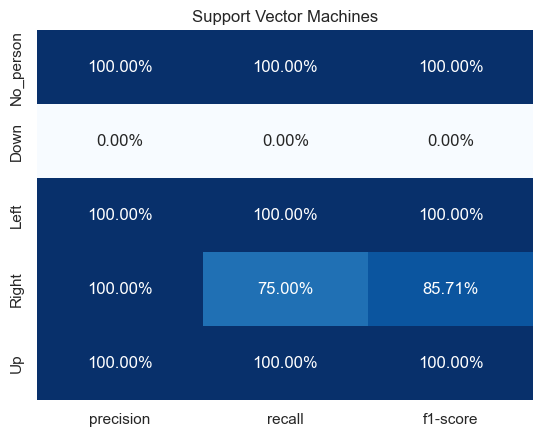

In [25]:
report_svm = classification_report(y_test, y_pred_svm_test, output_dict=True)
report_svm_df = pd.DataFrame(report_svm).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_svm_df=report_svm_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_svm_df=report_svm_df.drop(['support'], axis=1)
sns.heatmap(report_svm_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Support Vector Machines")


# 1.3 K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)
classifier_knn.fit(X_train,y_train)
y_pred_knn=classifier_knn.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_knn))
y_pred_knn_test=classifier_knn.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_knn_test))
KNN_Accuracy.append(accuracy_score(y_test,y_pred_knn_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.7777777777777778


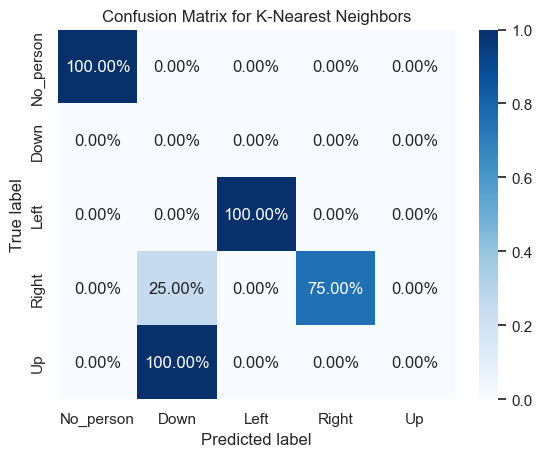

In [27]:
cm_knn = confusion_matrix(y_test, y_pred_knn_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [28]:
precision_knn = precision_score(y_test, y_pred_knn_test, average='micro')
recall_knn = recall_score(y_test, y_pred_knn_test, average='micro')
f1_knn = f1_score(y_test, y_pred_knn_test, average='micro')
accuracy_knn = accuracy_score(y_test, y_pred_knn_test)

print('Different metrics for testing data')
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1 score: ", f1_knn)
print("Accuracy: ", accuracy_knn)

Different metrics for testing data
Precision:  0.7777777777777778
Recall:  0.7777777777777778
F1 score:  0.7777777777777778
Accuracy:  0.7777777777777778


In [29]:
report_knn = classification_report(y_test, y_pred_knn_test)
print("Classification report for K-Nearest Neighbors:")
print(report_knn)

Classification report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86         4
           4       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.60      0.55      0.57         9
weighted avg       0.89      0.78      0.83         9



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

Text(0.5, 1.0, 'K-Nearest Neighbors')

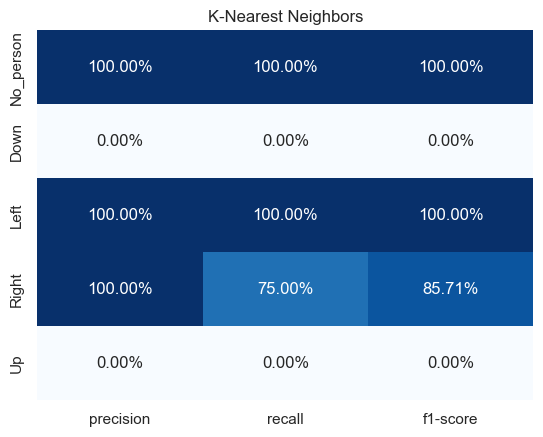

In [30]:
report_knn = classification_report(y_test, y_pred_knn_test, output_dict=True)
report_knn_df = pd.DataFrame(report_knn).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_knn_df=report_knn_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_knn_df=report_knn_df.drop(['support'], axis=1)
sns.heatmap(report_knn_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("K-Nearest Neighbors")


In [31]:
RF_accuracy=pd.DataFrame(data=RF_Accuracy[0:],
                columns=['RF'])

SVM_accuracy=pd.DataFrame(data=SVM_Accuracy[0:],
                columns=['SVM'])

KNN_accuracy=pd.DataFrame(data=KNN_Accuracy[0:],
                columns=['KNN'])
df_accuracy_new = pd.concat([RF_accuracy,SVM_accuracy,KNN_accuracy], axis=1)
df_accuracy_existing = pd.read_csv('human_walking_direction_df_accuracy_all_volunteers.csv').drop('Unnamed: 0',axis=1)
df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)
df_accuracy

C:\Users\hanan\AppData\Local\Temp\ipykernel_34508\3372602396.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)


,RF,SVM,KNN
0,0.500000,0.625000,0.875000
1,0.500000,1.000000,1.000000
2,0.500000,0.625000,0.750000
3,0.625000,1.000000,1.000000
4,0.555556,0.777778,0.666667
5,0.500000,0.875000,0.875000
6,0.555556,0.777778,0.666667
7,0.625000,1.000000,1.000000
8,0.777778,0.888889,0.777778


In [32]:
df_accuracy.to_csv(r'human_walking_direction_df_accuracy_all_volunteers.csv')